In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
all_dfs = {}
results = {}
for side in ['L','R']:  
    for n in range(5):
        df = pd.read_csv(f'../results/row{side}-{n}.csv',index_col=0).fillna(0)
        for s in ['window','middle','aisle']:
            results[f'row{side}-{n}-{s}'] = {}
            seat = f'{s} occupied'
            blocks = df[seat].ne(df[seat].shift()).cumsum()
            firsts = blocks.drop_duplicates()
            sizes = blocks.groupby(blocks).size()
            for b in sizes[sizes<20].index:
                new_value = df.loc[firsts[firsts==(b-1)].index,seat].values[0] if b!=1 else 0
                df.loc[blocks==b,seat] = new_value
                if new_value==0:
                    df.loc[blocks==b,f'{s} facing'] = 0
                
            blocks = df[seat].ne(df[seat].shift()).cumsum()
            firsts = blocks.drop_duplicates()
            values = df.loc[firsts.index,seat]
            if len(values)>1:
                boarded = values[values==1].index[0]
                departed = values[values==0].index[-1]-15
                ind_left = (values.loc[boarded:departed]==0).values
                sizes = blocks.loc[boarded:departed].groupby(blocks).size()
                facing = df[f'{s} facing'].replace(0, np.nan).value_counts()

                results[f'row{side}-{n}-{s}']['boarded'] = boarded/15
                results[f'row{side}-{n}-{s}']['departed'] = departed/15
                results[f'row{side}-{n}-{s}']['in seat'] = sizes[~ind_left].sum()
                results[f'row{side}-{n}-{s}']['out seat'] = sizes[ind_left].sum()
                results[f'row{side}-{n}-{s}']['num out'] = ind_left.sum()
                results[f'row{side}-{n}-{s}']['time out'] = sizes[ind_left].mean() if ind_left.sum()!=0 else 0
                results[f'row{side}-{n}-{s}']['facing forward'] = facing['forward']/facing.sum()

        if side == 'L':
            window_middle = ((df['window facing']=='right') & (df['middle facing']=='left')).sum()
            middle_aisle = ((df['middle facing']=='right') & (df['aisle facing']=='left')).sum()
            window_aisle = ((df['window facing']=='right') & (df['aisle facing']=='left')).sum()
        elif side == 'R':
            window_middle = ((df['window facing']=='left') & (df['middle facing']=='right')).sum()
            middle_aisle = ((df['middle facing']=='left') & (df['aisle facing']=='right')).sum()
            window_aisle = ((df['window facing']=='left') & (df['aisle facing']=='right')).sum()
        results[f'row{side}-{n}-window']['window_middle'] = window_middle
        results[f'row{side}-{n}-window']['window_aisle'] = window_aisle
        results[f'row{side}-{n}-middle']['window_middle'] = window_middle
        results[f'row{side}-{n}-middle']['middle_aisle'] = middle_aisle
        results[f'row{side}-{n}-aisle']['middle_aisle'] = middle_aisle
        results[f'row{side}-{n}-aisle']['window_aisle'] = window_aisle
        all_dfs[f'row{side}-{n}'] = df
all_dfs = pd.concat(all_dfs,axis=1)

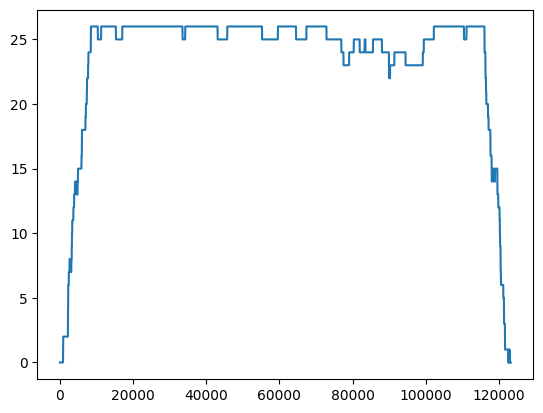

In [248]:
idx = pd.IndexSlice
plt.plot(all_dfs.loc[idx[:],idx[:,[f'{s} occupied' for s in ['window','middle','aisle']]]].sum(axis=1))
plt.show()

In [239]:
pd.DataFrame(results).T

,boarded,departed,in seat,out seat,num out,time out,facing forward,window_middle,window_aisle,middle_aisle
rowL-0-window,208.0,7970.0,7763.0,0.0,0.0,0.0,0.642610,253.0,48.0,NaN
rowL-0-middle,245.0,7844.0,7600.0,0.0,0.0,0.0,0.877854,253.0,NaN,1.0
rowL-0-aisle,58.0,7970.0,7640.0,273.0,2.0,136.5,0.789663,NaN,48.0,1.0
rowL-1-window,322.0,8031.0,7710.0,0.0,0.0,0.0,0.654872,15.0,106.0,NaN
rowL-1-middle,490.0,8035.0,7546.0,0.0,0.0,0.0,0.960892,15.0,NaN,2.0
rowL-1-aisle,259.0,8028.0,7750.0,20.0,1.0,20.0,0.858724,NaN,106.0,2.0
rowL-2-window,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
rowL-2-middle,564.0,5461.0,4849.0,49.0,1.0,49.0,0.655742,0.0,NaN,0.0
rowL-2-aisle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
rowL-3-window,150.0,8010.0,7861.0,0.0,0.0,0.0,0.462375,545.0,3282.0,NaN
